In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest

In [3]:
data = pd.read_csv('creditcard.csv')

In [4]:
data.shape

(284807, 31)

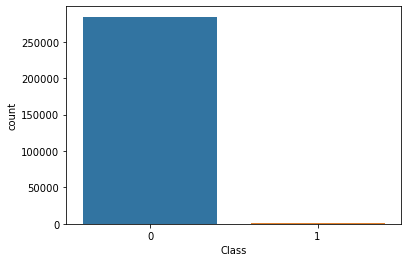

In [5]:
sns.countplot(x='Class',data=data)

In [8]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

### Definitely an Imbalanced set

In [6]:
fraud = data[data.Class==1]
Normal = data[data.Class==0]

In [7]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [8]:
Normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [9]:
def get_aucpr(labels, scores):
    precision, recall, th = precision_recall_curve(labels, scores)
    aucpr_score = np.trapz(recall, precision)
    return precision, recall, aucpr_score

isf score for sample size 0.1 is 0.27809654314165017


F:\AnacondaInst\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression score for sample size 0.1 is 0.6489479553659447
RandomForest score for sample size 0.1 is 0.8347019596361056
isf score for sample size 0.3 is 0.3338766840857955


F:\AnacondaInst\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression score for sample size 0.3 is 0.6773516485738283
RandomForest score for sample size 0.3 is 0.884472883278149


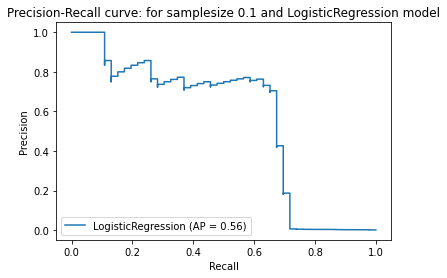

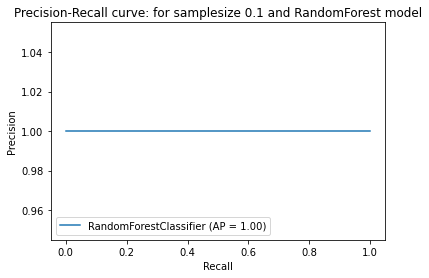

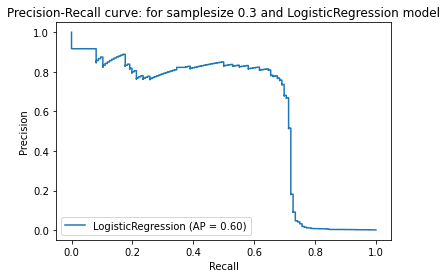

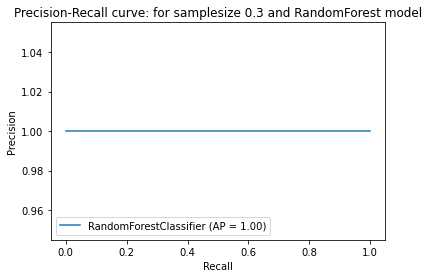

In [129]:
samplesize = [0.1,0.3]#,0.5,0.7,0.9]

for sample in samplesize:
    data1 = data.sample(frac = sample,random_state=42)
    outlier_fraction = data1.Class.value_counts()[1]/data1.Class.value_counts()[0]
    Y = data1['Class']
    X = data1.drop(columns = ['Class'])
    isf = IsolationForest(n_estimators=100, max_samples=len(X),contamination=outlier_fraction,random_state=42, verbose=0)
    isf.fit(X,Y)
    isfpredict = isf.predict(data.drop(columns='Class'))
    isfpredict[isfpredict == 1] = 0
    isfpredict[isfpredict == -1] = 1
    isf_aupc_score = get_aucpr(data.Class, isfpredict)[2]
    print('isf score for sample size {} is {}'.format(sample,isf_aupc_score))
    
    lr = LogisticRegression()
    lr.fit(X,Y)
    lrpredict = lr.predict(data.drop(columns='Class'))
    lr_aupc_score = get_aucpr(data.Class, lrpredict)[2]
    print('Logistic Regression score for sample size {} is {}'.format(sample,lr_aupc_score))
                           
    disp = plot_precision_recall_curve(lr, X, Y)
    disp.ax_.set_title('Precision-Recall curve: for samplesize {} and {} model'.format(sample,'LogisticRegression'))
    
    rf = RandomForestClassifier()
    rf.fit(X,Y)
    rfpredict = rf.predict(data.drop(columns='Class'))
    rf_aupc_score = get_aucpr(data.Class, rfpredict)[2]
    print('RandomForest score for sample size {} is {}'.format(sample,rf_aupc_score))
                           
    disp = plot_precision_recall_curve(rf, X, Y)
    disp.ax_.set_title('Precision-Recall curve: for samplesize {} and {} model'.format(sample,'RandomForest'))

isf score for sample size 0.5 is 0.30534095452630156


F:\AnacondaInst\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression score for sample size 0.5 is 0.6783126138025599
RandomForest score for sample size 0.5 is 0.9228437164564898
isf score for sample size 0.7 is 0.33084137230486554


F:\AnacondaInst\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression score for sample size 0.7 is 0.743670394244516
RandomForest score for sample size 0.7 is 0.9551956673979476
isf score for sample size 0.9 is 0.30640808259158897


F:\AnacondaInst\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression score for sample size 0.9 is 0.7288353240372484
RandomForest score for sample size 0.9 is 0.9891419730794161


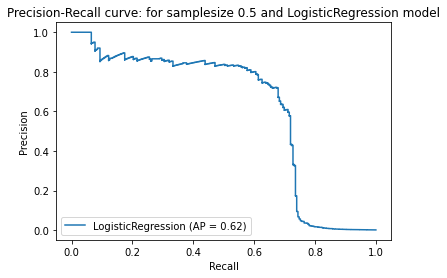

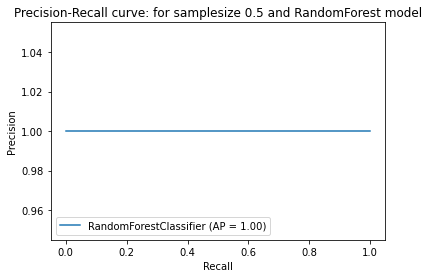

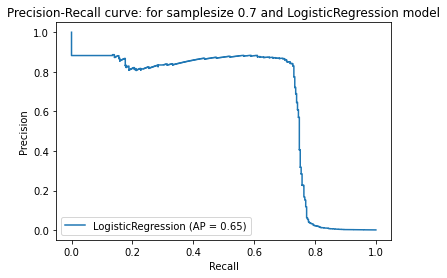

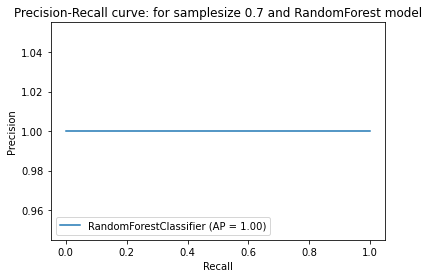

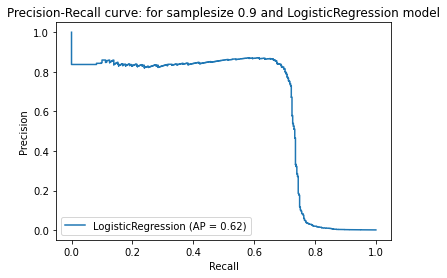

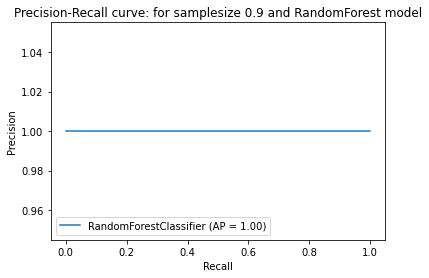

In [130]:
samplesize = [0.5,0.7,0.9]


for sample in samplesize:
    data1 = data.sample(frac = sample,random_state=42)
    outlier_fraction = data1.Class.value_counts()[1]/data1.Class.value_counts()[0]
    Y = data1['Class']
    X = data1.drop(columns = ['Class'])
    isf = IsolationForest(n_estimators=100, max_samples=len(X),contamination=outlier_fraction,random_state=42, verbose=0)
    isf.fit(X,Y)
    isfpredict = isf.predict(data.drop(columns='Class'))
    isfpredict[isfpredict == 1] = 0
    isfpredict[isfpredict == -1] = 1
    isf_aupc_score = get_aucpr(data.Class, isfpredict)[2]
    print('isf score for sample size {} is {}'.format(sample,isf_aupc_score))
    
    lr = LogisticRegression()
    lr.fit(X,Y)
    lrpredict = lr.predict(data.drop(columns='Class'))
    lr_aupc_score = get_aucpr(data.Class, lrpredict)[2]
    print('Logistic Regression score for sample size {} is {}'.format(sample,lr_aupc_score))
                           
    disp = plot_precision_recall_curve(lr, X, Y)
    disp.ax_.set_title('Precision-Recall curve: for samplesize {} and {} model'.format(sample,'LogisticRegression'))
    
    rf = RandomForestClassifier()
    rf.fit(X,Y)
    rfpredict = rf.predict(data.drop(columns='Class'))
    rf_aupc_score = get_aucpr(data.Class, rfpredict)[2]
    print('RandomForest score for sample size {} is {}'.format(sample,rf_aupc_score))
                           
    disp = plot_precision_recall_curve(rf, X, Y)
    disp.ax_.set_title('Precision-Recall curve: for samplesize {} and {} model'.format(sample,'RandomForest'))

The conclusion is:\
Best performance is given by Random Forest with an AUPRC score of $\textbf{0.98}$\
followed by Logistic Regression with an AUPRC score of $\textbf{0.74}$\
followed by Isolation Forest Algorithm with an AUPRC score of $\textbf{0.3}$